<a href="https://colab.research.google.com/github/k-gerasimova/numerical_methods-5-8/blob/main/lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def stability(sigma):
  if sigma<1/2: return True
  else:
    print(f"явная схема неустойчива при sigma={sigma}")
    return False

In [ ]:
a = 1
b = 0
f = lambda x,t: math.cos(x)*(math.cos(t) + math.sin(t))

alpha = 0
beta = 1
gamma = 1
delta = 0

l = np.pi/2
phi0 = lambda t:math.sin(t)
phi1 = lambda t:-math.sin(t)
psi = lambda x:0

U_true = lambda x,y:y*math.sin(x)

h = 0.1 #float(input())  #шаг по х
tau = 0.01 #float(input()) #шаг по t

x = np.arange(0, l + h, h)
x = np.linspace(0, l, round(l/h))
#t = np.arange(0, 1+tau, tau)
t = np.linspace(0, 1, round(1/tau))


In [ ]:
U_true_m = np.zeros((len(t),len(x)))
for k in range(len(t)):
   for i in range(len(x)):
      U_true_m[k, i] = U_true(x[i], t[k])



In [ ]:
df = pd.DataFrame(data=U_true_m, index=t, columns=x)
#pd.options.display.float_format = '{:20,.2f}'.format
df

,0.000000,0.104720,0.209440,0.314159,0.418879,0.523599,0.628319,0.733038,0.837758,0.942478,1.047198,1.151917,1.256637,1.361357,1.466077,1.570796
0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.010101,0.0,0.001056,0.002100,0.003121,0.004108,0.005051,0.005937,0.006759,0.007507,0.008172,0.008748,0.009228,0.009607,0.009880,0.010046,0.010101
0.020202,0.0,0.002112,0.004200,0.006243,0.008217,0.010101,0.011874,0.013518,0.015013,0.016344,0.017495,0.018455,0.019213,0.019761,0.020091,0.020202
0.030303,0.0,0.003168,0.006300,0.009364,0.012325,0.015152,0.017812,0.020277,0.022520,0.024516,0.026243,0.027683,0.028820,0.029641,0.030137,0.030303
0.040404,0.0,0.004223,0.008400,0.012486,0.016434,0.020202,0.023749,0.027036,0.030026,0.032688,0.034991,0.036911,0.038427,0.039521,0.040183,0.040404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.959596,0.0,0.100305,0.199511,0.296531,0.390303,0.479798,0.564036,0.642095,0.713119,0.776329,0.831034,0.876635,0.912630,0.938626,0.954339,0.959596
0.969697,0.0,0.101361,0.201611,0.299653,0.394411,0.484848,0.569974,0.648854,0.720625,0.784501,0.839782,0.885862,0.922237,0.948507,0.964385,0.969697
0.979798,0.0,0.102417,0.203711,0.302774,0.398520,0.489899,0.575911,0.655613,0.728132,0.792673,0.848530,0.895090,0.931843,0.958387,0.974431,0.979798
0.989899,0.0,0.103473,0.205812,0.305896,0.402628,0.494949,0.581848,0.662372,0.735638,0.800845,0.857278,0.904318,0.941450,0.968267,0.984476,0.989899


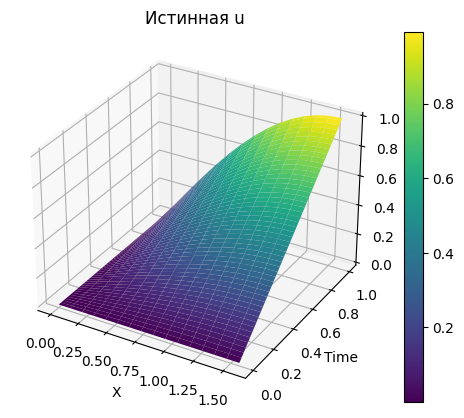

In [ ]:
x_mesh, t_mesh = np.meshgrid(x, t)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x_mesh, t_mesh, np.array(U_true_m), cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Time')
ax.set_zlabel('Value')
ax.set_title('Истинная u')
fig.colorbar(surf)

In [ ]:
def elleptic(x,y,h2,h1): #h1 шаг по х
  U = np.zeros((len(y),len(x)))
  U_prev = np.zeros((len(y),len(x)))
  U_raz = np.zeros((len(y), len(x)))
  for j in range(len(y)):
    U[j,0] = U_prev[j,0]=0
    U[j, -1] = U_prev[j, -1]= y[j]
  coef_uij = 2*h2**2 + 2*h1**2 -h1**2 * h2**2

  for j in range(1, len(y) - 1):
    for i in range(1, len(x) - 1):
      U_prev[j,i] = U_prev[j,0] + (U_prev[j,-1] - U_prev[j,0])/(x[-1]-x[0])*(x[i]-x[0])

  eps = 1e-10
  pogr=1
  while pogr > eps:
    for j in range(1, len(y) - 1):
      for i in range(1, len(x) - 1):
        U[j,i] = (h2**2 * (U_prev[j, i+1] + U_prev[j, i-1]) +
                h1**2 * (U_prev[j+1, i] + U_prev[j-1, i]))/coef_uij
      for i in range(1, len(x)):
        U[0, i] = (-2 * h2 * math.sin(x[i]) + 4 * U[1,i] - U[2,i]) / 3
    for i in range(1, len(x)- 1):
      U[-1, i] = (2*h2*math.sin(x[i])+4*U[-2, i] - U[-3,i])/(3)
    for i in range(len(x)):
      for j in range(len(y)):
        U_raz[j, i] = abs(U_prev[j,i] - U[j,i])
        U_prev[j, i] = U[j, i]
    pogr = np.amax(U_raz)
  return U


In [ ]:
def elleptic2(x,y,h2,h1, J = 0): #h1 шаг по х
  U = np.zeros((len(y),len(x)))
  U_prev = np.zeros((len(y),len(x)))
  U_raz = np.zeros((len(y), len(x)))
  for j in range(len(y)):
    U[j,0] = U_prev[j,0]=0
    U[j, -1] = U_prev[j, -1]= y[j]
  coef_uij = 2*h2**2 + 2*h1**2 -h1**2 * h2**2

  for j in range(1, len(y) - 1):
    for i in range(1, len(x) - 1):
      U_prev[j,i] = U_prev[j,0] + (U_prev[j,-1] - U_prev[j,0])/(x[-1]-x[0])*(x[i]-x[0])
  C=1.7
  eps = 1e-15
  pogr=1
  j = 0
  while pogr > eps:
    j+=1
    for j in range(1, len(y) - 1):
      for i in range(1, len(x) - 1):
        U[j,i] = C*(h2**2 * (U_prev[j, i+1] + U[j, i-1]) +
                h1**2 * (U_prev[j+1, i] + U[j-1, i]))/coef_uij +(1-C)*U_prev[j,i]
      for i in range(1, len(x)):
        U[0, i] = (-2 * h2 * math.sin(x[i]) + 4 * U[1,i] - U[2,i]) / 3
    for i in range(1, len(x)- 1):
      U[-1, i] = (2*h2*math.sin(x[i])+4*U[-2, i] - U[-3,i])/(3)
    for i in range(len(x)):
      for j in range(len(y)):
        U_raz[j, i] = abs(U_prev[j,i] - U[j,i])
        U_prev[j, i] = U[j, i]
    pogr = np.amax(U_raz)
    if (J != 0  and j == J): break
  return U

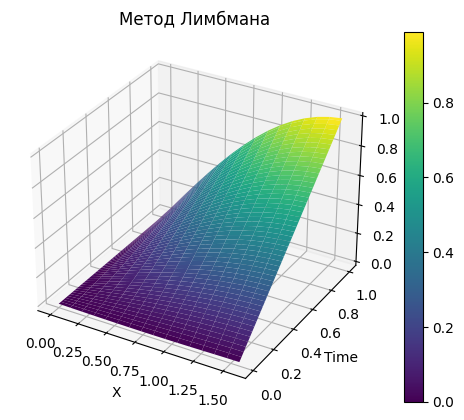

In [ ]:
x_mesh, t_mesh = np.meshgrid(x, t)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x_mesh, t_mesh, np.array(elleptic(x,t,tau,h)), cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Time')
ax.set_zlabel('Value')
ax.set_title('Метод Лимбмана')
fig.colorbar(surf)

Метод Зейделя

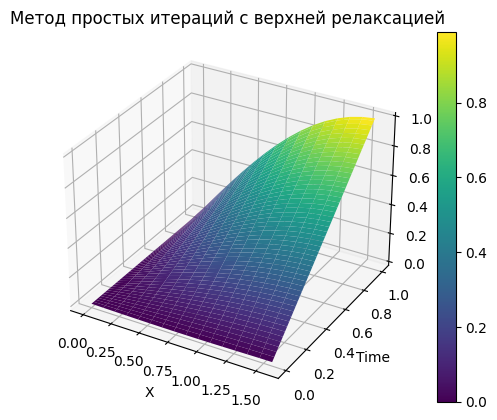

In [ ]:
x_mesh, t_mesh = np.meshgrid(x, t)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x_mesh, t_mesh, np.array(elleptic2(x,t,tau,h)), cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Time')
ax.set_zlabel('Value')
ax.set_title('Метод простых итераций с верхней релаксацией')
fig.colorbar(surf)

In [ ]:
def epsilon(U_have, U_find):
  pogr = 1
  U_raz = np.zeros((len(U_have), len(U_have[0])))
  for i in range(len(U_have)):
    for j in range(len(U_have[0])):
      U_raz[i, j] = abs(U_have[i,j] - U_find[i,j])
      pogr = np.amax(U_raz)
  return pogr

In [ ]:
epsilon(U_true_m,np.array(elleptic(x,t,tau,h)))

0.06582439480381863

In [ ]:
N = [10,30,50,70]
error_first = []
h = []
error_second = []
for n in range(len(N)):
  Nx = Ny = N[n]
  x = np.linspace(0, l, Nx) #начало, конец, кол-во
  t = np.linspace(0, 1, Ny)
  h.append(abs(x[0] - x[1]))
  U_have = np.zeros((len(t),len(x)))
  for k in range(len(t)):
    for j in range(len(x)):
      U_have[k, j] = U_true(x[j], t[k])
  U_2=elleptic2(x,t,x[1]-x[0],t[1]-t[0])
  error_second.append(epsilon(U_have, U_2))




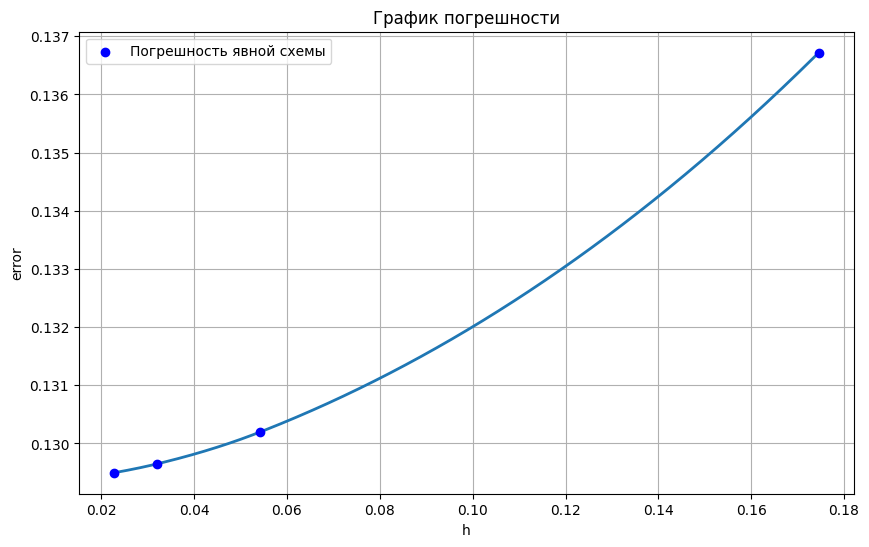

In [ ]:
from scipy.interpolate import PchipInterpolator

Y_reverse = error_second[::-1]
X_reverse =h[::-1]

pchip_reverse = PchipInterpolator(X_reverse, Y_reverse)

xnew_reverse = np.linspace(min(X_reverse), max(X_reverse), 1000)
ynew_reverse = pchip_reverse(xnew_reverse)

plt.figure(figsize=(10, 6))

plt.scatter(X_reverse, Y_reverse, c='blue', label='Погрешность явной схемы', zorder=6)

plt.plot(xnew_reverse, ynew_reverse, label='', linewidth=2)

plt.title('График погрешности')
plt.xlabel('h')
plt.ylabel('error')
plt.legend()
plt.grid(True)

plt.show()

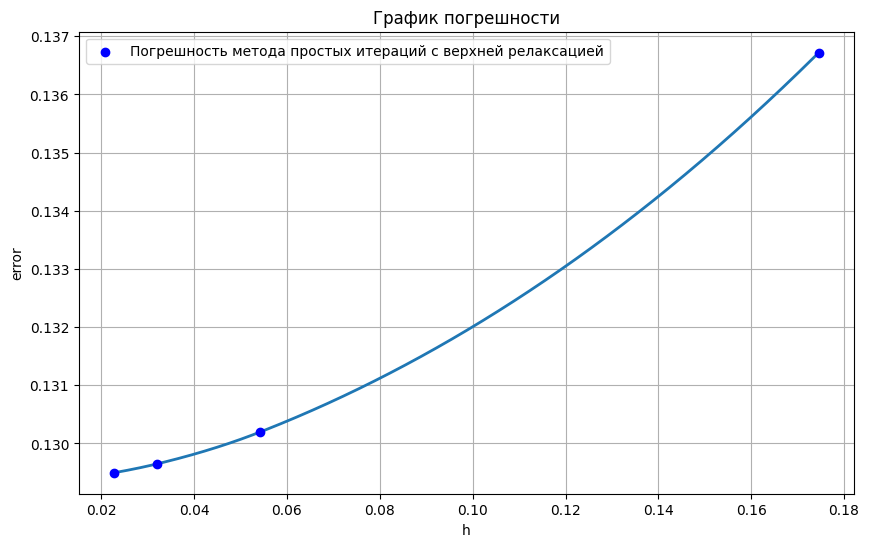

In [ ]:
from scipy.interpolate import PchipInterpolator
Y_reverse = error_second[::-1]
X_reverse = h[::-1]

pchip_reverse = PchipInterpolator(X_reverse, Y_reverse)

xnew_reverse = np.linspace(min(X_reverse), max(X_reverse), 1000)
ynew_reverse = pchip_reverse(xnew_reverse)

plt.figure(figsize=(10, 6))

plt.scatter(X_reverse, Y_reverse, c='blue', label='Погрешность метода простых итераций с верхней релаксацией', zorder=6)

plt.plot(xnew_reverse, ynew_reverse, label='', linewidth=2)

plt.title('График погрешности')
plt.xlabel('h')
plt.ylabel('error')
plt.legend()
plt.grid(True)

plt.show()